# Exercise set 1
## by Vira Shulha

Firtstly, I import:
1) a numpy library for generating random sets for both problems and calculating Euclidean distances
2) a matplotlib library for drawing plots for 2nd problem.

In [26]:
import numpy as np
import matplotlib.pyplot as plt

## Pre 1

There is a loop through every dimension, then a loop for generating every point and calculating a distance to the origin.

In [11]:
num_points = int(10e6) # total number of points
dims = [2, 3, 5, 7, 10, 13, 17] # list with dimensions
inside_per = {} # dictionary to save results for every dimension

for dim in dims:
    num_inside = 0 # to save number of points which are inside
    for i in range(num_points):
        point = np.random.uniform(low=-1, high=1, size=dim) # generating a random point
        dist = np.linalg.norm(point) # calculating a distance to the origin (norm)
        if dist <= 1:
            num_inside += 1 # adding a point if it is inside
    num_inside /= num_points # divide by total number of points to get proportion
    inside_per[dim] = num_inside * 100 # multiply by 100 to get %
print(inside_per) # print results for every dimension

{2: 78.53823, 3: 52.33892, 5: 16.42106, 7: 3.6982399999999997, 10: 0.24719999999999998, 13: 0.010830000000000001, 17: 7.999999999999999e-05}


Results <br>
2d: 78.53823% <br>
3d: 52.33892% <br>
5d: 16.42106% <br>
7d: 3.69824% <br>
10d: 0.2472% <br>
13d: 0.01083% <br>
17d: 0.00008%

As we can see from the results: the more dimensions the space has, the less proportion of points (uniformly distributed) are located inside the hypersphere.

In [12]:
num_points = int(10e6) # total number of points
dims = [2, 3, 5, 7, 10, 13, 17] # list with dimensions
inside_per = {} # dict to save result per dimension

for dim in dims:
    num_inside = 0 # saving number of points inside a (hyper)spherical shell
    for i in range(num_points):
        point = np.random.uniform(low=-1, high=1, size=dim) # generating random point
        dist = np.linalg.norm(point) # calculating a distance to the origin (norm)
        if 0.95 <= dist <= 1:
            num_inside += 1 # adding point if it us inside
    num_inside /= num_points # find proportion
    inside_per[dim] = num_inside * 100 # getting %
print(inside_per) # print results

{2: 7.648059999999999, 3: 7.47467, 5: 3.72401, 7: 1.11086, 10: 0.09771999999999999, 13: 0.00525, 17: 5.9999999999999995e-05}


Results <br>
2d: 7.64806% <br>
3d: 7.47467% <br>
5d: 3.72401% <br>
7d: 1.11086% <br>
10d: 0.09772% <br>
13d: 0.00525% <br>
17d: 0.00006% <br>

We can see the same result as with hypersphere but at the beginning (with 2 dims) there are not a lot of points inside this (hyper)spherical shell.

## Pre 2

I have decided to create function which returns indices of k closest points.

In [21]:
def find_k_closest(x, points, k=5):
    dists = []

    for point in points:
        dist = np.linalg.norm(x-point)
        dists.append(dist)
    
    dists_args = np.argsort(dists)
    return dists_args[:k]
            

Iterate for every dimension -> generate 2000 points and their target values -> divide into train and test -> create prediction using function -> calculate error -> plot results

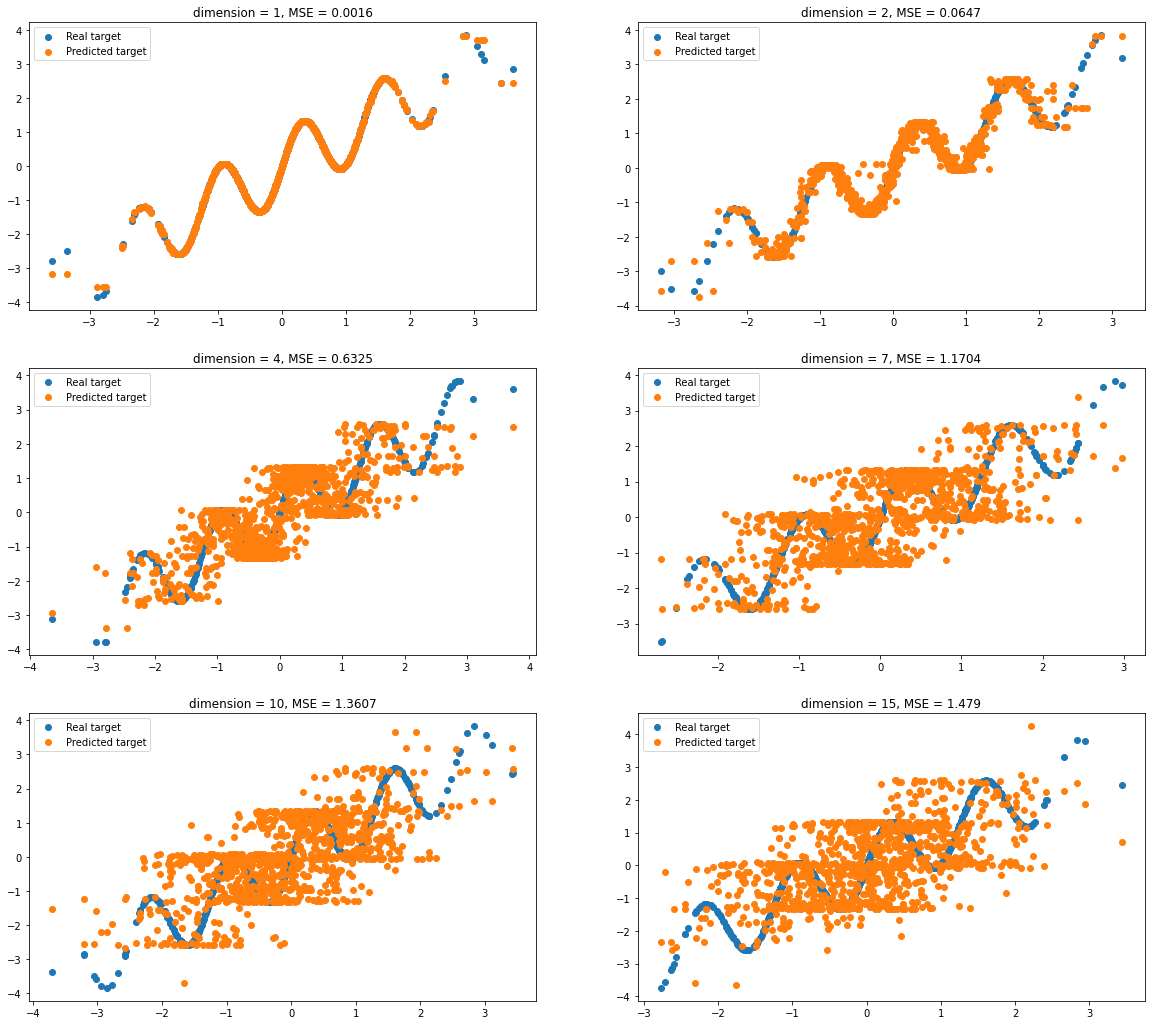

In [49]:
num_points = 2000 # total number of points 
dims = [1, 2, 4, 7, 10, 15] # list with dimensions
plt.figure(figsize=(20,18)) # figure for results

for idx, dim in enumerate(dims):
    points = [] # list with points
    targets = [] # list with targets
    for i in range(num_points):
        point = np.random.normal(loc=0, scale=1, size=dim) # generating a point
        target = point[0] + np.sin(point[0] * 5) # calculating a target value
        points.append(point) # add a point to the list with points
        targets.append(target) # add a target value to the list with target values

    train_x = np.array(points[:1000]) # select train points
    train_y = np.array(targets[:1000]) # selecr train targets

    test_x = np.array(points[1000:]) # select test points
    test_y = np.array(targets[1000:]) # select test targets
    
    predicted_y = [] # list with predicted target values

    for x in test_x:
        index_closest = find_k_closest(x, train_x)[0] # indices of 5 closest points
        predict = np.mean(train_y[index_closest]) # mean of the target of 5 closest points
        predicted_y.append(predict) # adding prediction to the list with predicted target values
        
    error = np.mean((predicted_y - test_y) ** 2) # calculating MSE
    title = 'dimension = ' + str(dim) + ', MSE = ' + str(np.round(error, 4)) # generating title for every plot
    x = test_x # for 1d space
    plt.subplot(idx+321) # create subplot
    if dim > 1: # for >1d space we select only first value
        x = test_x[:,0]
    plt.scatter(x, test_y) # plot x with real target
    plt.scatter(x, predicted_y) # plot x with predicted target
    plt.title(title) # adding a generated title
    plt.legend(['Real target', 'Predicted target'])
    
plt.show()